## *Tarea #1*
## Daniel Behar y Cruz del Cid

# Dataset Penguins

## Librerias

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [16]:
import warnings
warnings.filterwarnings('ignore')

## Read data

In [17]:
df = sns.load_dataset('datasets/penguins')       # importar el conjunto de datos

In [18]:
df.shape

(344, 7)

##### Tamaño del data set Penguins: 344 observaciones y 7 variables

## DataFrame exploration

In [19]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


- Species: especie de pinguino (variable categorica)
- Island: isla donde se observo al pinguinito (variable categorica)
- bill_length_mm: largo del pico en milimetros (variable numerica continua)
- bill_depth_mm: ancho del pico en milimetros (variable numerica continua)
- flipper_length_mm: largo de las alas en milimetros (variable numerica continua)
- body_mass_g: masa del pinguino en gramos (variable numerica continua)
- Sex: genero del pinguino (variable categorica)

#### Datos Faltantes

In [21]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [22]:
df = df.dropna()
df.shape

(333, 7)

#### Estadisticos de variables numericas

In [23]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


#### Correlacion de variables

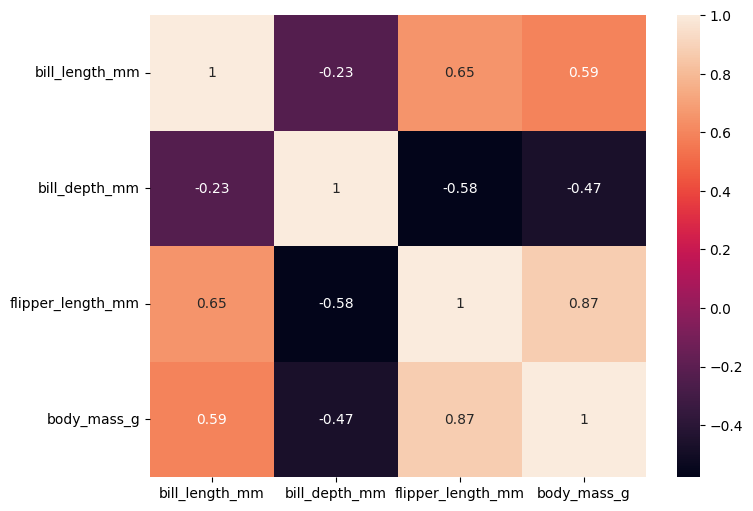

In [48]:
corr_df = df.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

## Exploratory data analysis (EDA)

## Histogramas

#### Histogramas de variables categoricas

In [27]:
df_cat = df[['species', 'island', 'sex']]
df_cat.head()

,species,island,sex
0,Adelie,Torgersen,Male
1,Adelie,Torgersen,Female
2,Adelie,Torgersen,Female
4,Adelie,Torgersen,Female
5,Adelie,Torgersen,Male


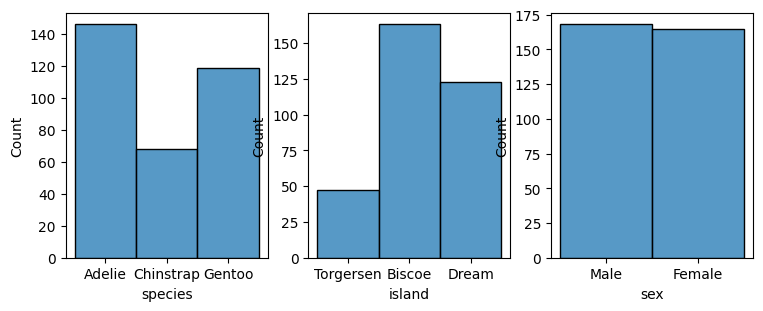

In [28]:
rows = 2
cols = 4
maxx = 3

plt.figure(figsize=(12,7))
for i in range(0, rows):
    for j in range(0, cols):
        if i*cols+j < maxx:
            plt.subplot(rows, cols, i*cols+j+1)
            sns.histplot(data=df_cat, x=df_cat.columns[i*cols+j])
plt.show()

- La distribucion observada de machos y hembras en la observacion es muy similar, indicando que son casi el mismo numero de machos y hembras
- Hubo mas observaciones en Biscoe y Dream que en Torgersen
- En minimo 2 islas hay presencia de por lo menos 2 especies de pinguinos, ya que Biscoe 
tiene mas pinguinos de la cantidad reportada para el genero Adelie. Caso contrario, en el que en cada isla solo hubiera una especie, tendria que haber similitudes mas marcadas
entre los histogramas de islas y especies

#### Histogramas y funciones de densidad para las variables numericas

array([[<AxesSubplot:title={'center':'bill_length_mm'}>,
        <AxesSubplot:title={'center':'bill_depth_mm'}>],
       [<AxesSubplot:title={'center':'flipper_length_mm'}>,
        <AxesSubplot:title={'center':'body_mass_g'}>]], dtype=object)

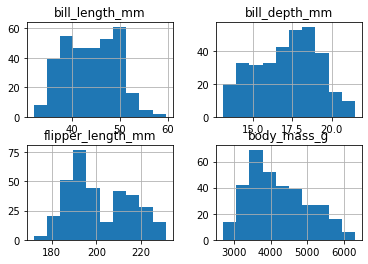

In [15]:
df.hist()

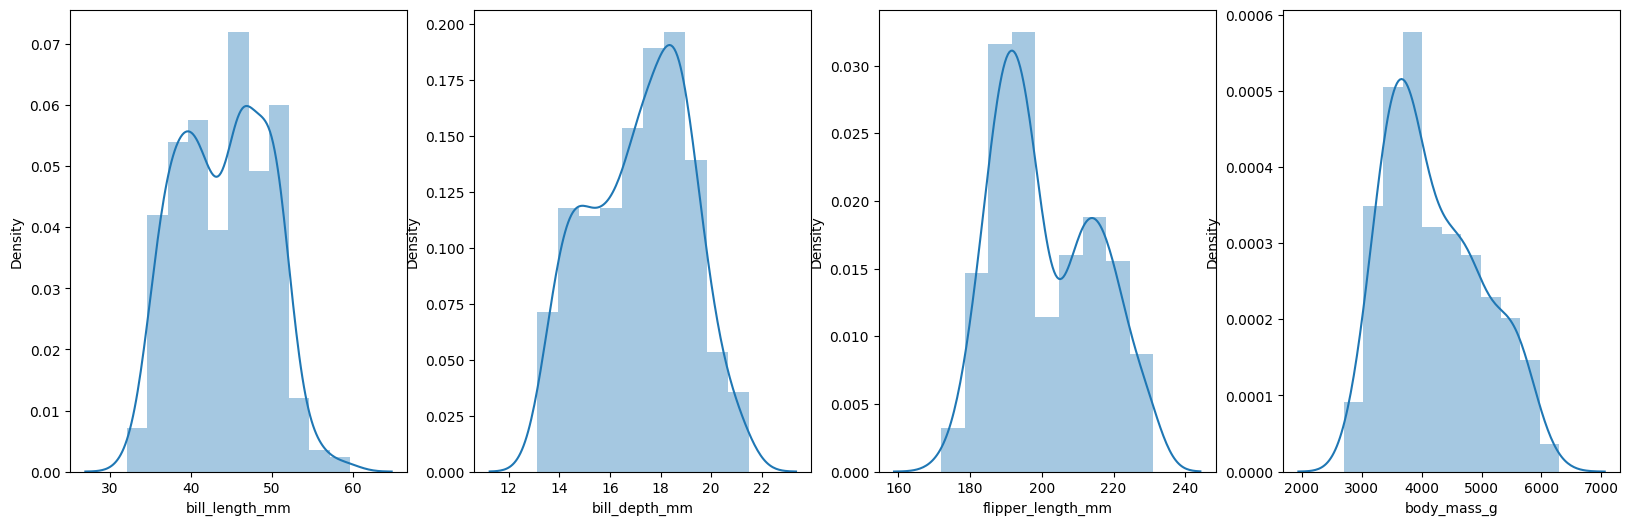

In [29]:
plt.figure(figsize=(20,6))
for i in range(0, 4):
    plt.subplot(1,4,i+1)
    sns.distplot(df[df.columns[2+i]], kde='True')
plt.show()

<Figure size 2000x600 with 0 Axes>

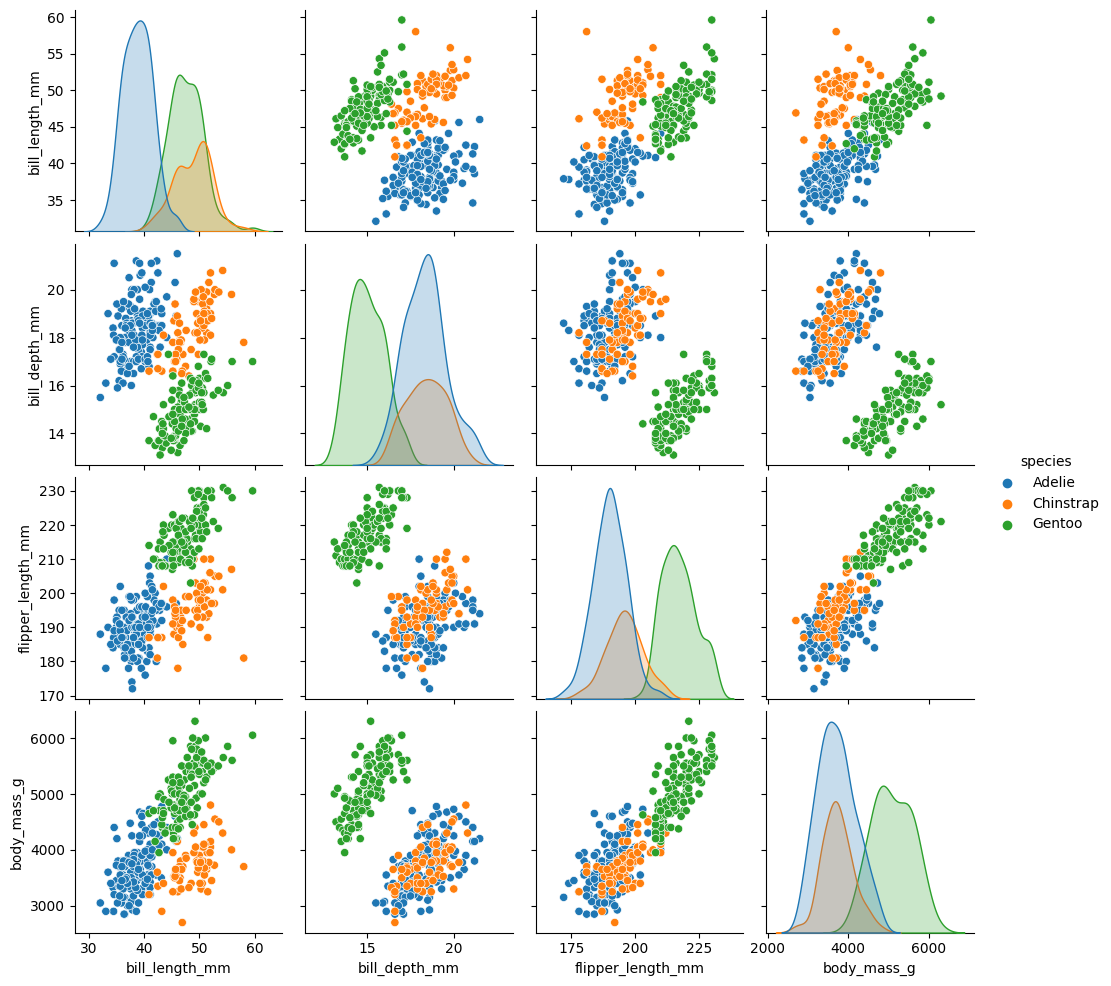

In [36]:
plt.figure(figsize=(20,6))
sns.pairplot(data=df, diag_kind='kde', hue='species')
plt.show()

#### Relaciones entre variables numericas y categoricas

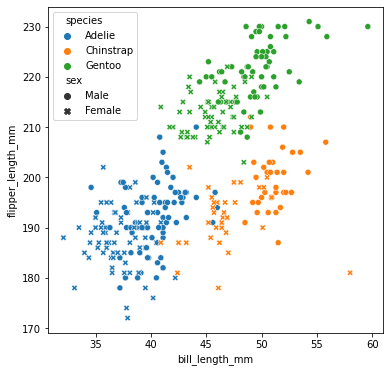

In [19]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df, x='bill_length_mm', y='flipper_length_mm', 
                hue='species', style='sex')
plt.show()

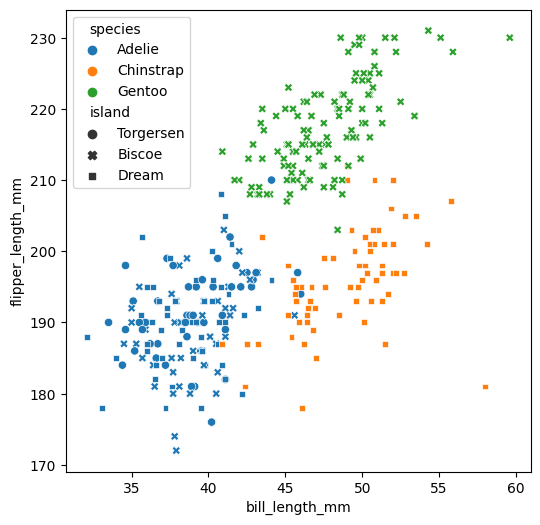

In [37]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df, x='bill_length_mm', y='flipper_length_mm', 
                hue='species', style='island')
plt.show()

- Chinstrap solo tiene observaciones en la isla Dream y Gentoo solo tiene observaciones en Biscoe
- Adelie tiene presencia en las tres islas, confirmando el supuesto de arriba, pero solo se encontró esta especie en la isla Torgersen

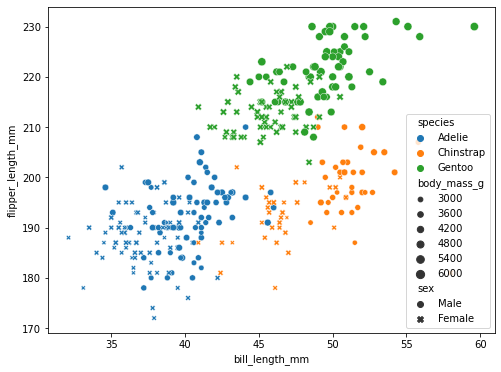

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='bill_length_mm', y='flipper_length_mm', 
                hue='species', style='sex', size='body_mass_g')
plt.show()

Los machos de todas las especies tienden a pesar mas que las hembras

## Densidades 2D

<Figure size 1500x600 with 0 Axes>

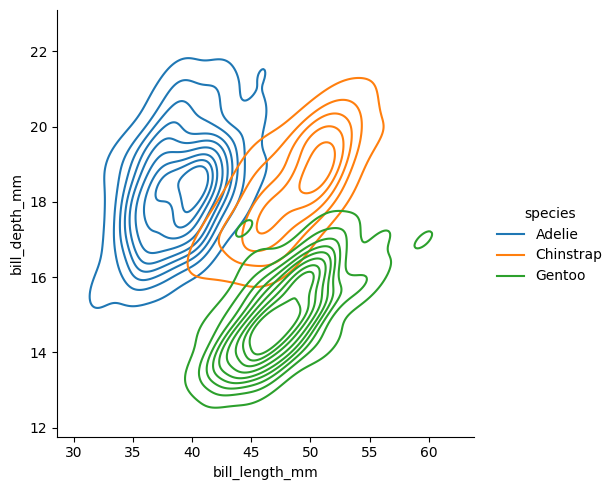

In [39]:
plt.figure(figsize=(15,6))
sns.displot(data=df, x='bill_length_mm', y='bill_depth_mm', kind='kde', hue='species')
plt.show()

<Figure size 1500x600 with 0 Axes>

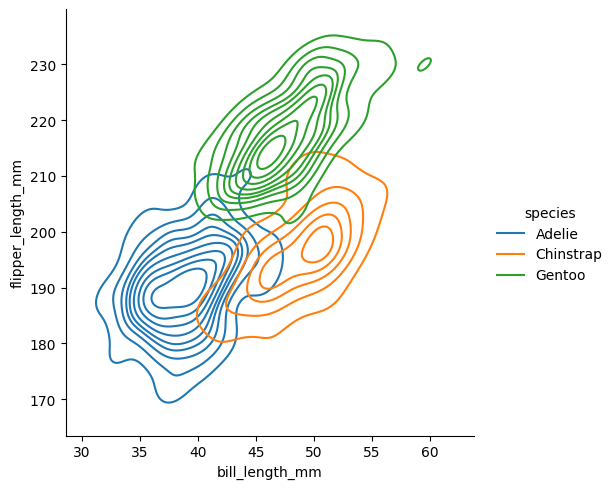

In [40]:
plt.figure(figsize=(15,6))
sns.displot(data=df, x='bill_length_mm', y='flipper_length_mm', kind='kde', hue='species')
plt.show()

<Figure size 1500x600 with 0 Axes>

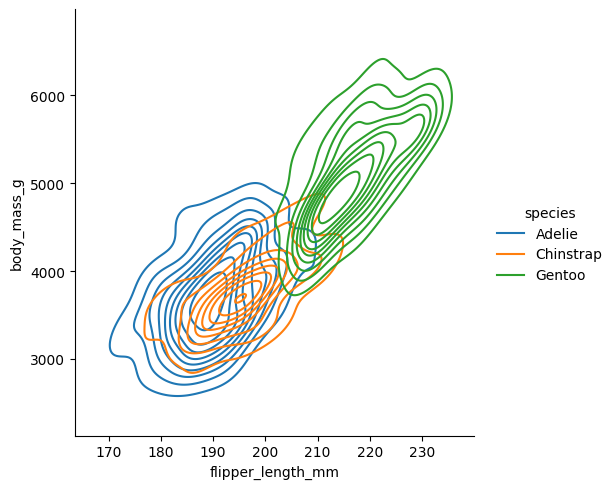

In [41]:
plt.figure(figsize=(15,6))
sns.displot(data=df, x='flipper_length_mm', y='body_mass_g', kind='kde', hue='species')
plt.show()

<Figure size 1500x600 with 0 Axes>

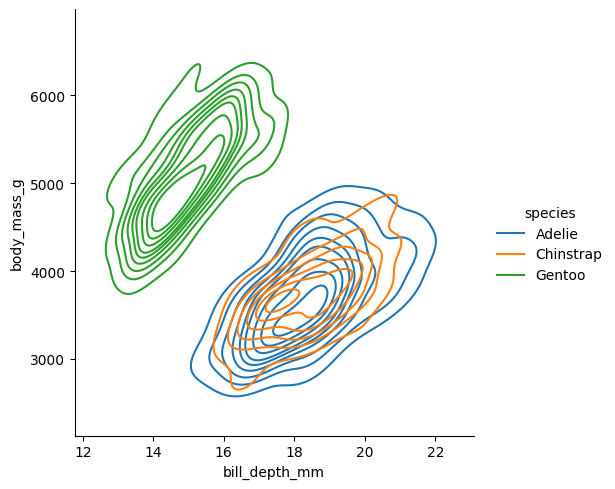

In [44]:
plt.figure(figsize=(15,6))
sns.displot(data=df, x='bill_depth_mm', y='body_mass_g', kind='kde', hue='species')
plt.show()

- Adelie y Chinstrap tienen proporciones y distribuciones de cuerpo similares, ya que la masa, relacionadas con el pico y el ala, son muy similares en ambos
- Gentoo tiene diferencias mas marcadas de entre las dos especies